In [1]:
from skimage.data import imread
from skimage.io import imshow,imsave
from skimage import img_as_float
import pandas as pd
import numpy as np
import cv2
from skimage.util import crop
from skimage.transform import rotate
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def deg_angle_between(x1,y1,x2,y2):
    from math import atan2, degrees, pi
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(-dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return(degs)

In [3]:
def get_rotated_cropped_fish(img,x1,y1,x2,y2):
    (h,w) = img.shape[:2]
    #calculate center and angle
    center = ( (x1+x2) / 2,(y1+y2) / 2)
    angle = np.floor(-deg_angle_between(x1,y1,x2,y2))
    #print('angle=' +str(angle) + ' ')
    #print('center=' +str(center))
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    fish_length = np.sqrt((x1-x2)**2+(y1-y2)**2)
    cropped = rotated[(max((center[1]-fish_length/1.8),0)):(max((center[1]+fish_length/1.8),0)) ,
                      (max((center[0]- fish_length/1.8),0)):(max((center[0]+fish_length/1.8),0))]
    #imshow(img)
    #imshow(rotated)
    #imshow(cropped)
    resized = resize(cropped,(224,224))
    return(resized)

In [4]:
label_files = ['bet_labels.json','alb_labels.json','yft_labels.json','dol_labels.json','shark_labels.json','lag_labels.json','other_labels.json']

data_dirs = ['/Users/yu/code/git/kaggle/input/train/BET/',
             '/Users/yu/code/git/kaggle/input/train/ALB/',
             '/Users/yu/code/git/kaggle/input/train/YFT/',
             '/Users/yu/code/git/kaggle/input/train/DOL/',
             '/Users/yu/code/git/kaggle/input/train/SHARK/',
             '/Users/yu/code/git/kaggle/input/train/LAG/',
             '/Users/yu/code/git/kaggle/input/train/OTHER/']


In [10]:
images = list()
labels_list = list()
for c in range(7):
    labels = pd.read_json(label_files[c])
    for i in range(len(labels)):
        try:
            img_filename = labels.iloc[i,2]
            print(img_filename)
            l1 = pd.DataFrame((labels[labels.filename==img_filename].annotations).iloc[0])
            image = imread(data_dirs[c]+img_filename)
            images.append(get_rotated_cropped_fish(image,np.floor(l1.iloc[0,1]),np.floor(l1.iloc[0,2]),np.floor(l1.iloc[1,1]),np.floor(l1.iloc[1,2])))
            print('success')
            labels_list.append(c)
        except:
            pass

image00107.jpg
img_00107.jpg


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


success
img_00158.jpg
success
img_00225.jpg
success
img_00231.jpg
success
img_00259.jpg
success
img_00321.jpg
success
img_00329.jpg
success
img_00363.jpg
success
img_00379.jpg
img_00435.jpg
success
img_00441.jpg
success
img_00443.jpg
success
img_00491.jpg
success
img_00531.jpg
success
img_00537.jpg
success
img_00542.jpg
success
img_00583.jpg
success
img_00601.jpg
success
img_00630.jpg
success
img_00732.jpg
success
img_00771.jpg
success
img_00774.jpg
success
img_00883.jpg
success
img_00888.jpg
success
img_00923.jpg
success
img_01002.jpg
success
img_01003.jpg
success
img_01118.jpg
success
img_01166.jpg
success
img_01194.jpg
success
img_01215.jpg
success
img_01218.jpg
success
img_01234.jpg
success
img_01264.jpg
success
img_01299.jpg
success
img_01343.jpg
success
img_01350.jpg
success
img_01351.jpg
success
img_01440.jpg
success
img_01450.jpg
success
img_01477.jpg
success
img_01481.jpg
success
img_01668.jpg
success
img_01696.jpg
success
img_01707.jpg
success
img_01725.jpg
success
img_01905.

In [78]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

2    644
1    186
0    185
3    116
4    104
5     67
6     58
Name: 0, dtype: int64

In [11]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

1    1710
2     731
6     299
0     199
4     175
3     117
5      67
Name: 0, dtype: int64

In [ ]:
image

In [26]:
for i in range(len(images)):
    imsave('../preprocessed_train/img_'+str(i)+'label_'+str(labels_list[i])+'.jpg',images[i])

In [13]:
import json

In [11]:
filename = label_json[1]["filename"]

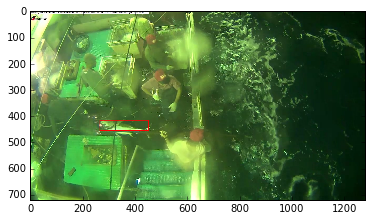

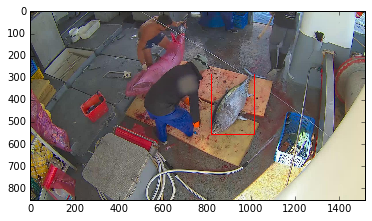

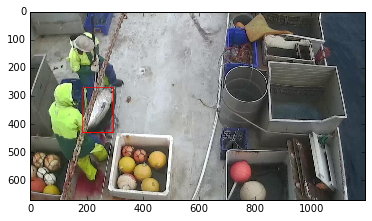

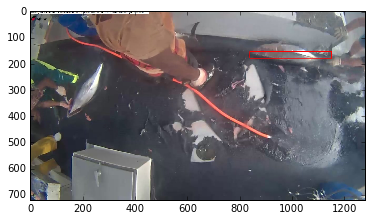

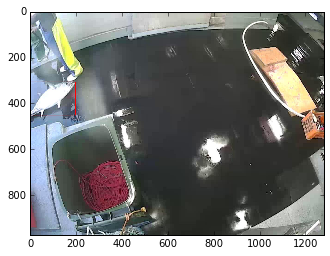

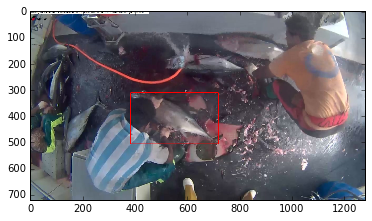

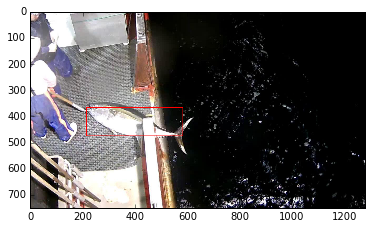

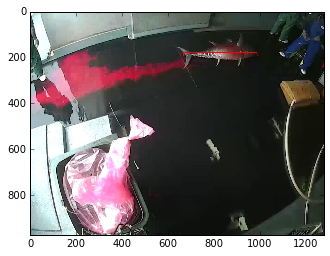

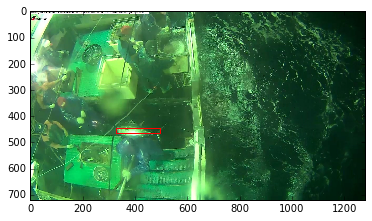

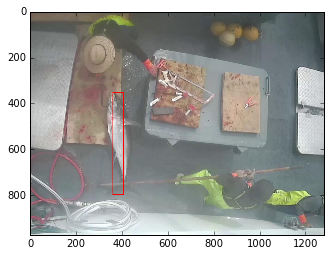

In [46]:
label_file = label_files[0]
with open(label_file, 'r') as f:
    label_json = json.load(f)

for index in random.sample(range(100), 10):
    lt, rb = label_json[index]["annotations"]
    lt_x, lt_y = lt["x"], lt["y"]
    rb_x, rb_y = rb["x"], rb["y"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[0] + filename
    img = imread(file_path)
    cv2.rectangle(img, (int(lt_x), int(lt_y)), (int(rb_x), int(rb_y)), 255, 2)
    plt.figure()
    plt.imshow(img)

In [48]:
with open('./label/bet_labels.json', 'r') as f:
    label_json = json.load(f)

In [62]:
label_json[0]["annotations"][0]["width"]

355.0

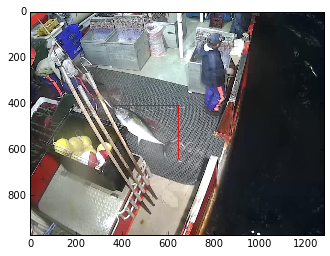

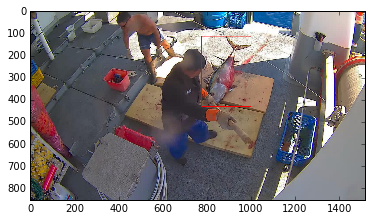

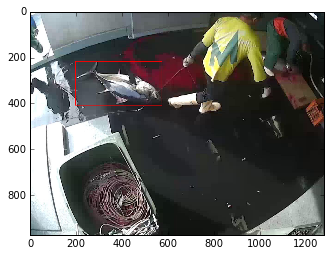

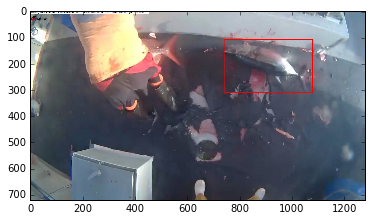

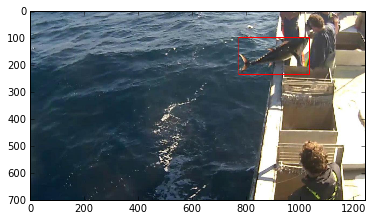

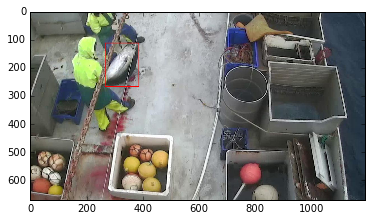

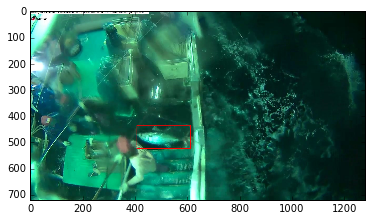

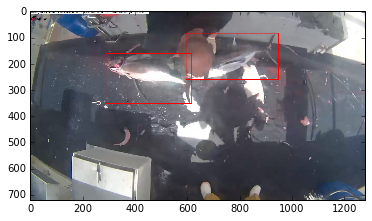

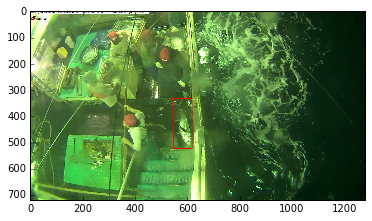

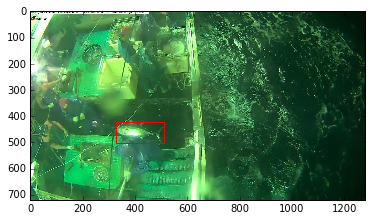

In [68]:
label_file = './label/bet_labels.json'
with open(label_file, 'r') as f:
    label_json = json.load(f)

for index in random.sample(range(100), 10):
    rect_lst = label_json[index]["annotations"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[0] + filename
    img = imread(file_path)
    for rect in rect_lst:
        x1, y1 = int(rect['x']), int(rect['y'])
        x2, y2 = x1+int(rect['width']), y1+int(rect['height'])
        cv2.rectangle(img, (x1, y1), (x2, y2), 255, 2)
    plt.figure()
    plt.imshow(img)